# K Nearest Neighbor

In [32]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [33]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [34]:
df = sns.load_dataset('iris')
knn = KNeighborsClassifier(n_neighbors=5)

In [35]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [36]:
X = df.drop(columns=['species'], axis=1)
y = df[['species']]

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=17)

In [38]:
knn_model = knn.fit(X_train, y_train)

/Users/admin/Desktop/MDS/ds-fundamentals/venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [39]:
y_test.head()

,species
16,setosa
78,versicolor
145,virginica
99,versicolor
126,virginica


In [40]:
predictions = knn.predict(X_test)
predictions

array(['setosa', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'setosa', 'virginica',
       'setosa', 'setosa', 'virginica', 'virginica', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor'],
      dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def calculate_accuracy(y_true, y_pred):
    a_score = accuracy_score(y_true, y_pred)
    p_score = precision_score(y_true, y_pred, average=None)
    r_score = recall_score(y_true, y_pred, average=None)
    f1_acc_score = f1_score(y_true, y_pred, average=None)

    print(p_score[1])

    print(f"Accuracy Score: {a_score}, Precision Score: {p_score}, R Score: {r_score}, F1 Score: {f1_acc_score}")

    return a_score, p_score, r_score, f1_acc_score

cm = confusion_matrix(y_test, predictions)
cm

array([[ 7,  0,  0],
       [ 0, 11,  0],
       [ 0,  2, 10]])

In [59]:
recall_score(y_test, predictions, average=None)

array([1.        , 1.        , 0.83333333])

<Axes: >

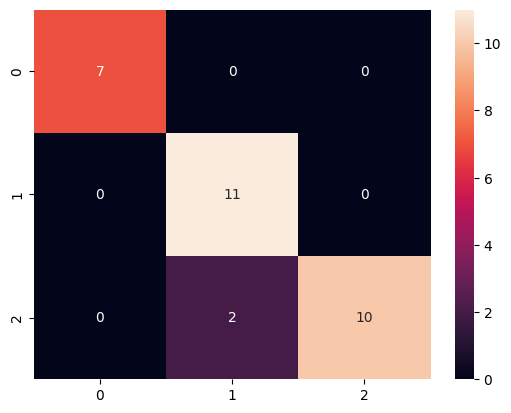

In [ ]:
sns.heatmap(cm, annot=True)